In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting and Visualizing data

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('train (1).csv')
print(data.describe())

# Removing any data point above x = 100
# There is only one record
data = data[data.x <= 100]

                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


In [5]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
# Separating dependednt & Indepented Variables 
x = data.iloc[:, 0:1].values
y = data.iloc[:, 1]

In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
print(x[:10])
print('\n')
print(y[:10])

[[24.]
 [50.]
 [15.]
 [38.]
 [87.]
 [36.]
 [12.]
 [81.]
 [25.]
 [ 5.]]


0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
6    10.780897
7    80.763399
8    24.612151
9     6.963319
Name: y, dtype: float64


In [8]:
# Model Import and Build
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)

In [40]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'X-Predictions')

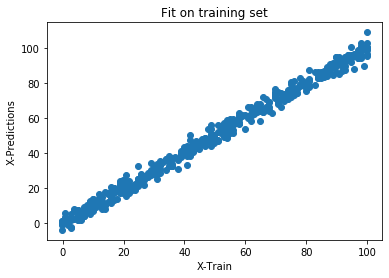

In [13]:
# Visualization
## Check the fitting on training set
y_pred = regressor.predict(x_train)
plt.scatter(y_pred, y_train)
#plt.plot(y_pred, y_train, color='black')
plt.title('Fit on training set')
plt.xlabel('X-Train')
plt.ylabel('X-Predictions')

Text(0, 0.5, 'X-Predictions')

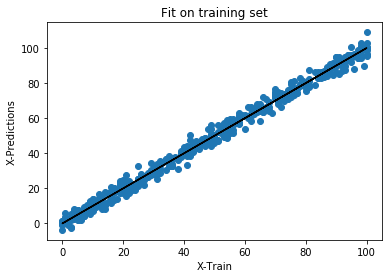

In [15]:
# Visualization
## Check the fitting on training set
#y_pred = regressor.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='black')
plt.title('Fit on training set')
plt.xlabel('X-Train')
plt.ylabel('X-Predictions')

Text(0, 0.5, 'Y-Test')

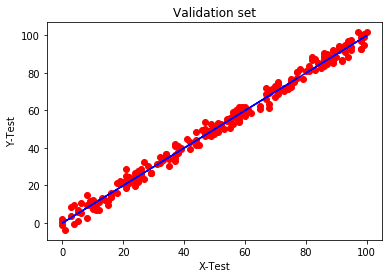

In [16]:
## Check fitting on validation set
plt.scatter(x_test, y_test, color='r')
plt.plot(x_test, pred, color='b')
plt.title('Validation set')
plt.xlabel('X-Test')
plt.ylabel('Y-Test')

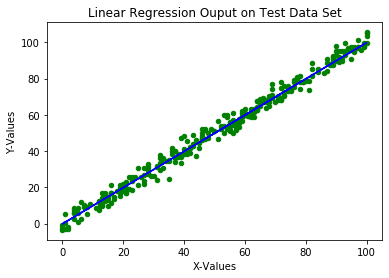

In [17]:
## Final test on Test Set
test = pd.read_csv('test.csv')
test.plot.scatter('x', 'y', color='g')
plt.plot(test['x'], regressor.predict(test.iloc[:,0:1].values), color='blue')
plt.title('Linear Regression Ouput on Test Data Set')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

In [23]:
regressor.score(x_test, y_test)

0.9904993488059491

#### Random Forest Regreession Implementation

In [24]:
from sklearn.ensemble  import RandomForestRegressor

In [25]:
rf_reg = RandomForestRegressor()

In [26]:
rf_reg.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
predictions = rf_reg.predict(x_test)

In [39]:
print ("Independent Var",x_test[0])
print (rf_reg.predict([x_test[0]]))

Independent Var [80.]
[76.87248772]


In [31]:
rf_reg.score(predictions.reshape(-1, 1), y_test)

0.9862901624555668